In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. 강의자료 8장의 74쪽에 있는 자료에서는 ResNet50 신경망을 이용하여‘elephant.jpg’
영상에 대한 실험을 수행하였다. 여기서는 VGG16을 활용하여 실험을 수행한다. 자전
거, 자동차, 사슴 등 다양한 영상을 5장 수집하고 실험을 수행하여 나오는 결과를 제
시하라.

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet') # ImageNet으로 학습된 신경망을 호출
img_path = '/content/drive/MyDrive/dataset/Elephant.jpg' # 샘플 영상을 입력. 크기는 관계없음
img = image.load_img(img_path, target_size=(224, 224)) # 영상을 resize 함
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch) print('Predicted:', decode_predictions(preds, top=3)[0])
decode_predictions(preds, top=3)[0]


35363/35363 [==============================] - 0s 1us/step


[('n01871265', 'tusker', 0.8576359),
 ('n02504458', 'African_elephant', 0.117461555),
 ('n02504013', 'Indian_elephant', 0.02467645)]

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import os

# VGG16 모델 불러오기 (최상위 부분 포함)
model = VGG16(weights='imagenet', include_top=True)

def load_preprocessing_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# 예시 이미지 경로
image_paths = [
    '/content/drive/MyDrive/dataset/bicycle.jpg',  # bicycle
    '/content/drive/MyDrive/dataset/car.jpg',      # car
    '/content/drive/MyDrive/dataset/reindeer.jpg', # reindder
    '/content/drive/MyDrive/dataset/Elephant.jpg', # eleplant
    '/content/drive/MyDrive/dataset/train.jpg',  # train
    '/content/drive/MyDrive/dataset/airplane.jpg',  # airplane
]

images = [load_preprocessing_image(img_path) for img_path in image_paths]

# None 타입의 이미지를 제거
images = [img for img in images if img is not None]

def predict_and_decode(image):
    preds = model.predict(image)
    decoded_preds = decode_predictions(preds, top=3)[0]
    return decoded_preds

results = [predict_and_decode(img) for img in images]

for i, result in enumerate(results):
    print(f"Image {i+1} Predictions:")
    for pred in result:
        print(f"{pred[1]}: {pred[2]*100:.2f}%")
    print("\n")

1/1 [==============================] - 0s 23ms/step
Image 1 Predictions:
mountain_bike: 69.63%
bicycle-built-for-two: 10.57%
tricycle: 6.85%


Image 2 Predictions:
convertible: 43.58%
car_wheel: 26.84%
sports_car: 10.67%


Image 3 Predictions:
hartebeest: 34.93%
ox: 24.03%
bighorn: 10.22%


Image 4 Predictions:
African_elephant: 59.58%
tusker: 38.78%
Indian_elephant: 1.63%


Image 5 Predictions:
electric_locomotive: 60.96%
bullet_train: 22.24%
passenger_car: 15.95%


Image 6 Predictions:
airliner: 96.08%
wing: 3.88%
warplane: 0.04%




2. ResNet50 신경망을 호출하고 여기에 summary() 함수를 수행하여 구조와 파라미터 수가 어떻게 되는지 결과를 제시하라

In [ ]:
from tensorflow.keras.applications import ResNet50

# ResNet50 모델 불러오기 (최상위 부분 X)
model = ResNet50(weights='imagenet', include_top=False) # ImageNet으로 학습된 신경망을 호출

# 모델 구조와 파라미터 수 요약
model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                      

3. 강의자료 8장의 81~86쪽에서는 VGG16을 이용한 실험 결과를 제시하였다. 여기서는
ResNet50 신경망을 사용하도록 프로그램을 수정하고 결과를 제시하라.
‘cats and dogs’의 실험 영상 directory는 Google drive에 올릴 예정.

In [ ]:
import keras

from keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                     include_top=False,
                     input_shape=(150, 150, 3))

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/dataset/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [ ]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 5, 5, 2048))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory( # 데이터를 읽음
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
      features_batch = conv_base.predict(inputs_batch) # conv_base 사용
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= sample_count:
        break
  return features, labels

train_samples = 2000
validation_samples = 1000
test_samples = 1000

train_features, train_labels = extract_features(train_dir, train_samples)
validation_features, validation_labels = extract_features(validation_dir, validation_samples)
test_features, test_labels = extract_features(test_dir, test_samples)


Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 25ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 34ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 25ms/step


In [ ]:
train_features = np.reshape(train_features, (train_samples, 5 * 5 * 2048))
validation_features = np.reshape(validation_features, (validation_samples, 5 * 5 * 2048))
test_features = np.reshape(test_features, (test_samples, 5 * 5 * 2048))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=5 * 5 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20
100/100 [==============================] - 4s 16ms/step - loss: 1.6043 - acc: 0.5350 - val_loss: 0.6816 - val_acc: 0.6430
Epoch 2/20
100/100 [==============================] - 2s 19ms/step - loss: 0.7126 - acc: 0.5320 - val_loss: 0.6742 - val_acc: 0.4990
Epoch 3/20
100/100 [==============================] - 1s 11ms/step - loss: 0.6936 - acc: 0.5530 - val_loss: 0.7300 - val_acc: 0.5000
Epoch 4/20
100/100 [==============================] - 1s 9ms/step - loss: 0.6903 - acc: 0.5545 - val_loss: 1.1451 - val_acc: 0.5000
Epoch 5/20
100/100 [==============================] - 1s 7ms/step - loss: 0.6898 - acc: 0.5485 - val_loss: 0.6705 - val_acc: 0.6150
Epoch 6/20
100/100 [==============================] - 1s 9ms/step - loss: 0.6842 - acc: 0.5475 - val_loss: 0.6695 - val_acc: 0.6310
Epoch 7/20
100/100 [==============================] - 1s 7ms/step - loss: 0.6845 - acc: 0.5650 - val_loss: 0.6658 - val_acc: 0.6050
Epoch 8/20
100/100 [==============================] - 1s 9ms/step - loss:

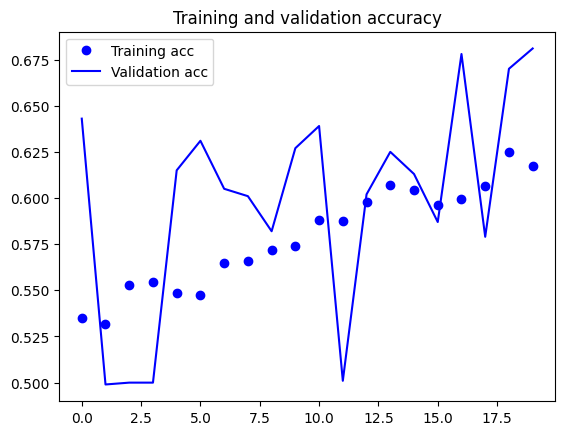

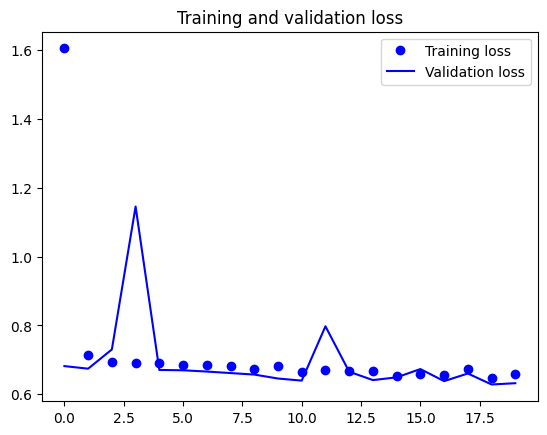

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

4. 강의자료 81쪽의 프로그램을 ResNet50에 적용했을 때 나타나는 구조와 파라미터 수를 제시하고 위의 2번 결과와 비교해보라. 최상위 레이어를 제거했을 때 결과가 어떻
게 바뀌었는지 설명하라.

In [ ]:
import keras

from keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet')

conv_base.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

- ResNet 50 최종 parameter 개수, 최상위 Layer 제거

```
==================================================================================================
Total params: 23587712 (89.98 MB)
Trainable params: 23534592 (89.78 MB)
Non-trainable params: 53120 (207.50 KB)
__________________________________________________________________________________________________

```




- ResNet 50 최종 parameter 개수, 최상위 Layer 제거 X

```
==================================================================================================
Total params: 25636712 (97.80 MB)
Trainable params: 25583592 (97.59 MB)
Non-trainable params: 53120 (207.50 KB)
__________________________________________________________________________________________________
```



- 2번 문제 Parameter, 최상위 Layer 제거

```
==================================================================================================
Total params: 23587712 (89.98 MB)
Trainable params: 23534592 (89.78 MB)
Non-trainable params: 53120 (207.50 KB)
__________________________________________________________________________________________________
```

